### Importing the Libraries

In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(1234)

import warnings
warnings.simplefilter("ignore")

In [122]:
#from google.colab import drive
#drive.mount('/content/drive')


In [123]:
# Loading the dataset
# Dataset is given from https://www.kaggle.com/basilb2s/language-detection with some modification as well as another language, i.e. Persian. 
#%time data = pd.read_csv("/content/drive/MyDrive/language_detection.csv")
%time data = pd.read_csv("language_detection.csv")


CPU times: user 54.6 ms, sys: 10.1 ms, total: 64.7 ms
Wall time: 82.9 ms


### Get familiar with the data¶

> Indented block



In [124]:
data.head(10)

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English
5,"[2] In ancient philosophy, natura is mostly us...",English
6,"[3][4] \nThe concept of nature as a whole, the...",English
7,During the advent of modern scientific method ...,English
8,"[5][6] With the Industrial revolution, nature ...",English
9,"However, a vitalist vision of nature, closer t...",English


In [125]:
# value count for each language
data["Language"].value_counts(), len(data)

(English       1385
 French        1014
 Spanish        819
 Portuguese     739
 Italian        698
 Russian        692
 Swedish        676
 Malayalam      594
 Dutch          546
 Arabic         536
 Turkish        474
 German         470
 Tamil          469
 Persian        466
 Danish         428
 Kannada        369
 Greek          365
 Hindi           63
 Name: Language, dtype: int64, 10803)

In [126]:
# separating the independent and dependant features
X = data["Text"]
Y = data["Language"]

In [127]:
# converting categorical variables to numerical

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
%time y = le.fit_transform(Y)

CPU times: user 4.09 ms, sys: 0 ns, total: 4.09 ms
Wall time: 4.63 ms


### Text preprocessing

> Indented block



In [128]:
# Data Sanitation by removing unnecessary characters
import re

data_list = []
for text in X:
    extras = '«»\n\r\t!"$%&/{}[]()=?\\`´*+~#-_.:,;<>|1234567890°-\'۰۱۲۳۴۵۶۷۸۹،×„”“•′؟؛'
    rx = '[' + re.escape(''.join(extras)) + ']'
    text = re.sub(' +', ' ', re.sub(rx, ' ', text) ).strip()
    text = text.lower().replace(' ', '_')
    data_list.append(text)

### Train Test split

In [129]:
from sklearn.model_selection import train_test_split

%time X_train, X_test, y_train, y_test = train_test_split(data_list, y, test_size = 0.20, random_state=1234)

CPU times: user 5.31 ms, sys: 0 ns, total: 5.31 ms
Wall time: 5.29 ms


### Bag of Words
Using bigrams and trigrams

In [130]:
# creating bag of words using countvectorizer

from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(analyzer='char', stop_words='english', ngram_range=(2,3), min_df=5, )
%time x_train = cv.fit_transform(X_train).toarray()
%time x_test = cv.transform(X_test).toarray()
x_train.shape, x_test.shape

CPU times: user 1.5 s, sys: 816 ms, total: 2.31 s
Wall time: 2.37 s
CPU times: user 372 ms, sys: 319 ms, total: 691 ms
Wall time: 692 ms


((8642, 22728), (2161, 22728))

### Multinomial Naive Model creation and Prediction

In [131]:
from sklearn.naive_bayes import MultinomialNB

modelMNB = MultinomialNB()
%time  modelMNB.fit(x_train, y_train)

CPU times: user 2min 8s, sys: 205 ms, total: 2min 8s
Wall time: 2min 9s


MultinomialNB()

In [132]:
# number of times each token appears across all classes

params_dic = {'token':cv.get_feature_names()}
params_dic.update({le.inverse_transform([i])[0]:modelMNB.feature_count_[i,:] for i in range(17)})
tokens = pd.DataFrame(params_dic).set_index('token')
tokens.sample(100)

,Arabic,Danish,Dutch,English,French,German,Greek,Hindi,Italian,Kannada,Malayalam,Persian,Portuguese,Russian,Spanish,Swedish,Tamil
token,,,,,,,,,,,,,,,,,
ζει,0.0,0.0,0.0,0.0,0.0,0.0,12.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
_эк,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0
änt,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0
çu_,0.0,0.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
r_c,0.0,4.0,3.0,62.0,59.0,2.0,0.0,0.0,22.0,0.0,0.0,0.0,44.0,0.0,29.0,4.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
tme,0.0,0.0,1.0,6.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
سخ,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,32.0,0.0,0.0,0.0,0.0,0.0
pé_,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [133]:
# number of sample in each class of trained model

params_dic = {'language': [le.inverse_transform([i])[0] for i in range(len(le.classes_))], 
              '#samples': modelMNB.class_count_ }
langs = pd.DataFrame(params_dic)
langs.T

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
language,Arabic,Danish,Dutch,English,French,German,Greek,Hindi,Italian,Kannada,Malayalam,Persian,Portuguese,Russian,Spanish,Swedish,Tamil,Turkish
#samples,432.0,337.0,439.0,1093.0,820.0,377.0,293.0,48.0,574.0,302.0,461.0,368.0,614.0,547.0,656.0,534.0,364.0,383.0


In [134]:
#model = pickle.load(open('model.pkl', 'rb'))
pd.DataFrame(x_test, columns=cv.get_feature_names())
#cv.get_feature_names()[0], cv.get_feature_names()[1] 

,_a,_a_,_aa,_ab,_ac,_ad,_af,_ag,_ah,_ai,...,’e,’en,’es,’i,’id,’in,’o,’u,’é,…_
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2156,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2158,8,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2159,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [135]:
# Prediction 
y_pred = modelMNB.predict(x_test)

### Evaluating the MNB model

In [136]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score

ac = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
cr = classification_report(y_test, y_pred, target_names=np.unique(le.inverse_transform(y_test)))

In [137]:
print("Accuracy is :",ac)

Accuracy is : 0.985192040721888


In [138]:
# classification report
print(cr)

              precision    recall  f1-score   support

      Arabic       1.00      0.98      0.99       104
      Danish       1.00      0.90      0.95        91
       Dutch       0.98      0.99      0.99       107
     English       0.98      0.99      0.99       292
      French       0.97      0.99      0.98       194
      German       0.99      0.99      0.99        93
       Greek       1.00      1.00      1.00        72
       Hindi       1.00      1.00      1.00        15
     Italian       0.96      0.98      0.97       124
     Kannada       1.00      1.00      1.00        67
   Malayalam       1.00      1.00      1.00       133
     Persian       0.99      1.00      0.99        98
  Portuguese       0.98      0.98      0.98       125
     Russian       1.00      1.00      1.00       145
     Spanish       0.99      0.95      0.97       163
     Swedish       0.95      0.99      0.97       142
       Tamil       1.00      1.00      1.00       105
     Turkish       0.99    

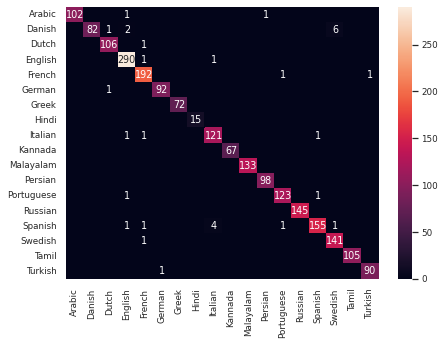

In [139]:
# visualising the confusion matrix

import seaborn as sns

labels = pd.DataFrame(cm).applymap(lambda v: f"{v}" if v!=0 else f"")
ticks = np.unique(le.inverse_transform(y_test))
plt.figure(figsize=(7,5))
sns.heatmap(cm, annot=labels, fmt='s', xticklabels=ticks, yticklabels=ticks, linewidths=0 )
plt.savefig('confusionMat.pdf', dpi=600)
plt.show()

In [140]:
s = ["this is test for 4th.",
     "أي تغيير  يتلاعب  بطريقة  بشكل  بسلامة يعتبر",
     "امروز هوا بارانی است.",
     "Eftersom Wikipedia bygger på tidskriftsartiklar, forskningspublikationer och böcker finns risk för rundgång ",
     "loro tre erano amiche da secoli, ma Terry ed Ellie avevano un segreto entrambe.",
     "Ja",]
sv = cv.transform(s).toarray()
l = modelMNB.predict(sv)
le.inverse_transform(l)

array(['English', 'Arabic', 'Persian', 'Swedish', 'Italian', 'Swedish'],
      dtype=object)

### Model Saving

In [141]:
# saving both cv and nbmodel

#import pickle

#pickle.dump(cv, open("transform.pkl", "wb"))
#pickle.dump(model, open("model.pkl", "wb"))

## Neural Network model

In [142]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import Adam
from torch.optim.lr_scheduler import StepLR
from torchsummary import summary

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [143]:
from collections import Counter, defaultdict
import math, time

def timeSince(since):
    now = time.time()
    s = now - since
    m = math.floor(s / 60)
    s -= m * 60
    return '%dm %ds' % (m, s)

A two-layer Neural Neworks with Fully Connected layers and ReLU as its nonlinearity, this network outperforms our baseline -- MultiNaive Bayes model

In [144]:

class Net(nn.Module):
  def __init__(self, input_size, output_size, dropout=0.6):
    super(Net, self).__init__()
    self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, output_size*4),
            nn.ReLU(), nn.Dropout(dropout),
            nn.Linear(output_size*4, output_size),
            nn.ReLU()
    )

  def forward(self, x):
    return self.linear_relu_stack(x)

input_size = len(cv.vocabulary_)
output_size = len(le.classes_)

summary(Net(input_size, output_size), input_size=(input_size,), batch_size=-1,  device='cpu')

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Linear-1                   [-1, 72]       1,636,488
              ReLU-2                   [-1, 72]               0
           Dropout-3                   [-1, 72]               0
            Linear-4                   [-1, 18]           1,314
              ReLU-5                   [-1, 18]               0
Total params: 1,637,802
Trainable params: 1,637,802
Non-trainable params: 0
----------------------------------------------------------------
Input size (MB): 0.09
Forward/backward pass size (MB): 0.00
Params size (MB): 6.25
Estimated Total Size (MB): 6.34
----------------------------------------------------------------


In [281]:
def fwd_pass(X, y, net, loss_function, optimizer, train=False):
    if train: net.train()
    else:     net.eval()

    outputs = net(X)
    with torch.no_grad():
      out = outputs.argmax(dim=1)
      acc = accuracy_score(y.cpu(), out.cpu())
      f1 = f1_score(y.cpu(), out.cpu(), average="weighted")
    loss = loss_function(outputs, y)

    if train:
      optimizer.zero_grad()
      loss.backward()
      optimizer.step()

    return loss, acc, f1


X_test = torch.tensor(x_test, dtype=torch.float).to(device)
Y_test = torch.tensor(y_test, dtype=torch.long).to(device)

lr = 0.01
epochs = 20
batch = 512

input_size = len(cv.vocabulary_)
output_size = len(le.classes_)
modelNN = Net(input_size, output_size).to(device)
bestModel = modelNN

optimizer = Adam(modelNN.parameters(), lr=lr)
lr_scheduler = StepLR(optimizer, step_size=10, gamma=0.86)
criterion = nn.CrossEntropyLoss()

print_every = epochs//10
train_losses, val_losses = [], []
accuracies, val_accuracies = [], []
f1s, val_f1s = [], []


torch.manual_seed(1234)

start = time.time()
print(f'Training Starts ...')
n =  batch * int(len(x_train)/batch)

best_loss = float(inf)

for epoch in range(epochs+1):
    train_loss, test_loss = 0, 0
    for i in range(int(len(x_train)/batch)):
        print(f'\rCycle{i:3} from {int(len(x_train)/batch):3} in epoch {epoch:3}', end='')
        loss, acc, f1 = fwd_pass(
            torch.tensor(x_train[(i) * batch: (i+1) * batch], dtype=torch.float).view(batch, -1).to(device), # X
            torch.tensor(y_train[(i)*batch:(i+1)*batch], dtype=torch.long).to(device), # Y
            modelNN, criterion, optimizer, True)
        train_loss += loss.item()

    train_losses.append(train_loss)
    accuracies.append(acc)
    f1s.append(f1)
    
    val_loss, val_acc, val_f1 = fwd_pass(X_test, Y_test, modelNN, criterion, optimizer, False)
    val_accuracies.append(val_acc)
    val_losses.append(val_loss.item())
    val_f1s.append(val_f1)

    if  best_loss>val_loss:
      best_loss=val_loss
      best_model = modelNN
    lr_scheduler.step()

    if epoch <= 3 or epoch%print_every==0: 
        print(f'\r====> Epoch [{epoch:3}] Train/Validation loss: {train_loss:.9f}/{val_loss:.9f} :: Accuracy: {acc*100:7.5f}/{val_acc*100:7.5f}, F1 Scores: {f1:.5f}/{val_f1:.5f}')

        
print(f"Training ends at {timeSince(start)}")

Training Starts ...
====> Epoch [  0] Train/Validation loss: 18.251189142/0.309439778 :: Accuracy: 87.50000/94.16937, F1 Scores: 0.85648/0.92950
====> Epoch [  1] Train/Validation loss: 5.206183702/0.225673541 :: Accuracy: 92.77344/93.70662, F1 Scores: 0.90604/0.91481
====> Epoch [  2] Train/Validation loss: 4.054428026/0.206812635 :: Accuracy: 93.35938/94.12309, F1 Scores: 0.91182/0.92179
====> Epoch [  3] Train/Validation loss: 3.515053019/0.199387848 :: Accuracy: 94.14062/94.07682, F1 Scores: 0.92002/0.91907
====> Epoch [  4] Train/Validation loss: 3.398608297/0.194963917 :: Accuracy: 93.55469/94.03054, F1 Scores: 0.91357/0.92080
====> Epoch [  6] Train/Validation loss: 1.852691412/0.062917084 :: Accuracy: 98.82812/98.56548, F1 Scores: 0.98796/0.98559
====> Epoch [  8] Train/Validation loss: 1.127012305/0.060249705 :: Accuracy: 99.21875/98.47293, F1 Scores: 0.99224/0.98470
====> Epoch [ 10] Train/Validation loss: 0.600376813/0.058520745 :: Accuracy: 99.21875/98.61175, F1 Scores: 0.9

Using matplotlib backend: agg
Populating the interactive namespace from numpy and matplotlib


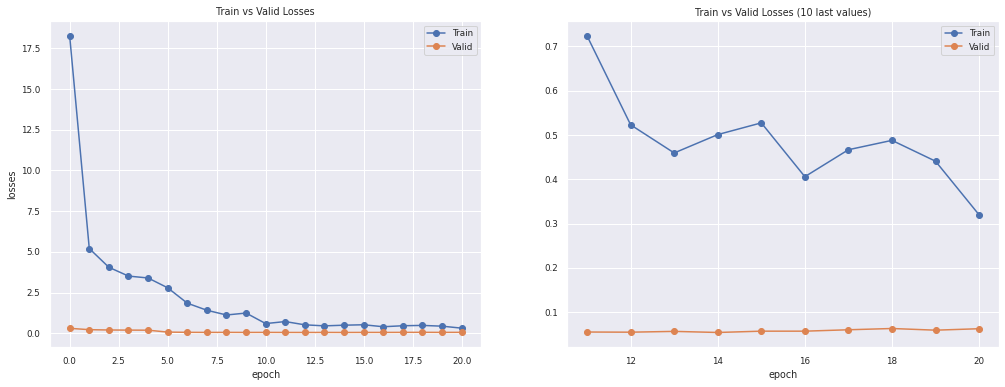

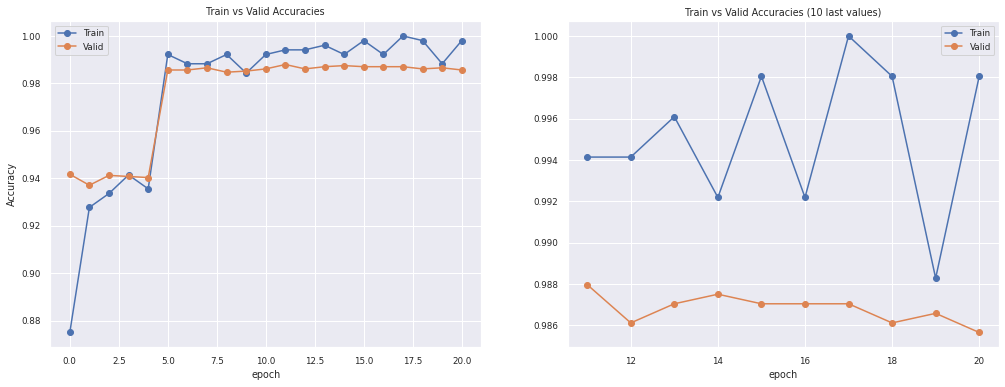

(None,)

In [282]:
%pylab
%matplotlib inline

def res_plot(plotdata, xlabel='epoch', ylabel='losses', legend=['Train','Valid'], title=''):
    fig, (ax1, ax2) = plt.subplots(1,2, figsize = (17,6))
    ax1.set_ylabel(ylabel)
    for ax in (ax1, ax2):
        n = 10 if ax==ax2 else 0
        x = range(epochs-n+1, epoch+1) if ax==ax2 else range(epochs+1)
        title = f"{title} ({n} last values)" if ax==ax2 else title
        ax.set_xlabel(xlabel)
        ax.set_title(title)
        ax.plot(x, plotdata[0][-n:], '-o', label=legend[0])
        ax.plot(x, plotdata[1][-n:], '-o', label=legend[1])
        ax.legend()
    plt.show()


res_plot([(train_losses), (val_losses)], title='Train vs Valid Losses')
res_plot([accuracies, val_accuracies], ylabel='Accuracy', title='Train vs Valid Accuracies'), 

Accuracy is 0.985654789449329
f1-score is 0.9856066460964164


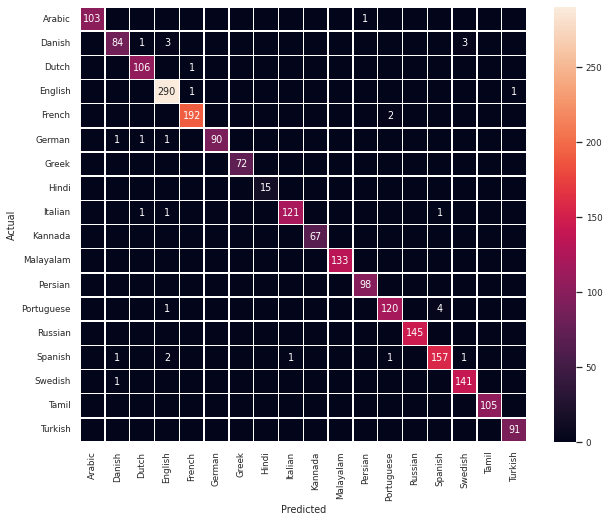

In [283]:
best_model.eval()
out = best_model(X_test).to(device)
out = out.argmax(dim=1)
accuracy = accuracy_score(y_test, out.cpu())
f1score = f1_score(Y_test.cpu(), out.cpu(), average='weighted')
print(f"Accuracy is {accuracy}\nf1-score is {f1score}")    

conf_matrix = confusion_matrix(y_pred=out.cpu(), y_true=y_test)
ticks = [le.inverse_transform([j])[0] for j in range(len(le.classes_))]
df_cm = pd.DataFrame(conf_matrix, columns=ticks , index=ticks)
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,8))
sns.set(font_scale = .8)
labels = pd.DataFrame(df_cm).applymap(lambda v: f"{v}" if v!=0 else f"")
sns.heatmap(df_cm,annot=labels,fmt="s",linewidths=.5)
plt.show()

# Evaluating the accuracy of Neural Network model on unseen data

In [284]:
# Dataset is given from https://ufal.mff.cuni.cz/~kocmanek/2016/docs/lanidenn_testset.txt
#%time ldata = pd.read_csv("/content/drive/MyDrive/lanidenn_testset.csv", delimiter="^", header=None, names=['Language', 'Text'])
%time ldata = pd.read_csv("lanidenn_testset.csv", delimiter="^", header=None, names=['Language', 'Text'])

CPU times: user 55.4 ms, sys: 5.98 ms, total: 61.4 ms
Wall time: 62.4 ms


In [285]:
ldata.head(10)

,Language,Text
0,hif,"Ii sandhi 1919 me, bina German sarkar ke part..."
1,mkd,Наум Охридски“ на брегот на Охридското Езеро ...
2,fry,De 23-jierrige Chris de Wagt trochrûn by SK C...
3,lus,"Mi 1500 chuang exam paper, ni hnih khat leka ..."
4,ast,El Burj Khalifa ye actualmente el rascacielos...
5,pan,ਮੈਨੂੰ ਉਸ ਦੀ ਖ਼ੁਸ਼ਬੂ ਪਸੰਦ ਹੈ।
6,cos,La Grecia entra in guerra è si schjera cù l'I...
7,scn,Doppu aviri pirdutu la battagghia ligali cu J...
8,zho,许多普通农民不敢对他们的领主反抗，因为他们在许多方面依靠这些领主。尤其农村的上层阶层呼吁改...
9,nds,"He weet nich, ’keen ik bün."


In [286]:
!pip install iso639

In [287]:
import iso639

langlist = ('eng', 'rus', 'ita', 'fra', 'fas', 'tur', 'deu', 'spa',
            'dan', 'kan', 'por', 'mal', 'swe', 'dut', 'ara', 'tam', 'dan', 'gre', 'hin' )
RX = ldata.loc[ldata['Language'].isin(langlist)]["Text"]
RY = ldata.loc[ldata['Language'].isin(langlist)]["Language"]

rx = cv.transform([i for i in RX]).toarray()
yhatnb = modelMNB.predict(rx)

rx = torch.tensor(rx, dtype=torch.float).to(device)
ry = [le.transform([iso639.to_name(i).split(';')[0]]) for i in RY]

with torch.no_grad():
  yhatnn = best_model(rx)
  yhatnn = yhatnn.argmax(dim=1)

accnn = accuracy_score(ry, yhatnn.cpu())
accnb = accuracy_score(ry, yhatnb)

print(f"Accuracy of Trained Neural Network is  {accnn*100}\
        \n\rAccuracy of Multinomial Naive Bayes is {accnb*100}")

Accuracy of Trained Neural Network is  97.3125        
Accuracy of Multinomial Naive Bayes is 96.4375
